In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_data = pd.merge(ride_df, city_df)
# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

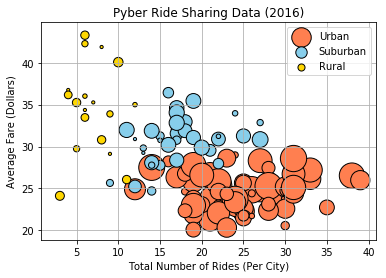

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_datapoints = combined_data[['city', 'fare', 'driver_count', 'type']].loc[combined_data['type'] == 'Urban']
rural_datapoints = combined_data[['city', 'fare', 'driver_count', 'type']].loc[combined_data['type'] == 'Rural']
suburban_datapoints = combined_data[['city', 'fare', 'driver_count', 'type']].loc[combined_data['type'] == 'Suburban']

#obtain driver counts for each city
driver_count = combined_data[['city', 'driver_count', 'type']].drop_duplicates(subset="city")

#urban x axis
urban_rides_per_city = urban_datapoints.groupby("city").count()
urban_x_axis = urban_rides_per_city['fare'].tolist()

#urban y axis
urban_avg_fare = urban_datapoints.groupby('city').mean()
urban_y_axis = urban_avg_fare['fare'].tolist()

#urban driver count 
urban_driver_count = driver_count.loc[driver_count['type'] == 'Urban']
urban_driver_count = urban_driver_count["driver_count"].tolist()
urban_driver_count = [s*10 for s in urban_driver_count]

#suburban x axis
suburban_rides_per_city = suburban_datapoints.groupby("city").count()
suburban_x_axis = suburban_rides_per_city['fare'].tolist()

#suburban y axis
suburban_avg_fare = suburban_datapoints.groupby('city').mean()
suburban_y_axis = suburban_avg_fare['fare'].tolist()

#suburban driver count 
suburban_driver_count = driver_count.loc[driver_count['type'] == 'Suburban']
suburban_driver_count = suburban_driver_count["driver_count"].tolist()
suburban_driver_count = [s*10 for s in suburban_driver_count]

#rural x axis
rural_rides_per_city = rural_datapoints.groupby("city").count()
rural_x_axis = rural_rides_per_city['fare'].tolist()

#rural y axis
rural_avg_fare = rural_datapoints.groupby('city').mean()
rural_y_axis = rural_avg_fare['fare'].tolist()

#rural driver count 
rural_driver_count = driver_count.loc[driver_count['type'] == 'Rural']
rural_driver_count = rural_driver_count["driver_count"].tolist()
rural_driver_count = [s*10 for s in rural_driver_count]


# Build the scatter plots for each city types
plt.scatter(urban_x_axis, urban_y_axis, s = urban_driver_count, edgecolors="black", facecolors = "Coral", label = "Urban")
plt.scatter(suburban_x_axis, suburban_y_axis, s = suburban_driver_count, edgecolors="black", facecolors = "SkyBlue", label = "Suburban")
plt.scatter(rural_x_axis, rural_y_axis, s = rural_driver_count, edgecolors="black", facecolors = "Gold", label = "Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare (Dollars)")
plt.grid()

# Create a legend
plt.legend()
# Incorporate a text label regarding circle size

# Save Figure
plt.show()

According to this graph, Urban locations have more rides that are shorter, but Suburban regions have fewer, longer rides. 

## Total Fares by City Type

Below, we can see that the vast majority of fares come from urban locations, which indicates that most of the money made by Pyber is in a city. 

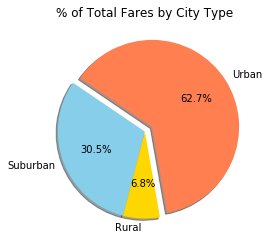

In [5]:
urban_fares = urban_datapoints.groupby('type').sum()
urban_fares = urban_fares['fare'].tolist()
suburban_fares = suburban_datapoints.groupby('type').sum()
suburban_fares = suburban_fares['fare'].tolist()
rural_fares = rural_datapoints.groupby('type').sum()
rural_fares = rural_fares['fare'].tolist()
fares = [urban_fares, suburban_fares, rural_fares]
labels = ["Urban", "Suburban", "Rural"]
colors = ["Coral", "SkyBlue", "Gold"]
explode = (0.1, 0, 0)
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

Below, we can see that the majority of rides are also in urban locations

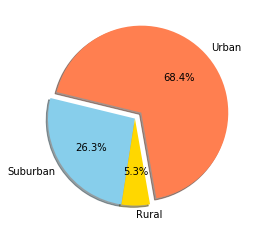

In [9]:
# Calculate Type Percents
urban_rides = len(urban_datapoints)
suburban_rides = len(suburban_datapoints)
rural_rides = len(rural_datapoints)
# Build Pie Chart
fares = [urban_rides, suburban_rides, rural_rides]
labels = ["Urban", "Suburban", "Rural"]
colors = ["Coral", "SkyBlue", "Gold"]
explode = (0.1, 0, 0)
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
# Save Figure
plt.show()

## Total Drivers by City Type

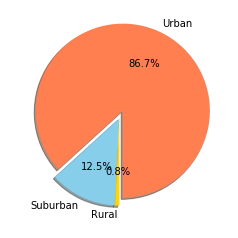

In [6]:
# Calculate Driver Percents
urban_drivers = urban_datapoints.groupby('type').sum()
urban_drivers = urban_drivers['driver_count'].tolist()
suburban_drivers = suburban_datapoints.groupby('type').sum()
suburban_drivers = suburban_drivers['driver_count'].tolist()
rural_drivers = rural_datapoints.groupby('type').sum()
rural_drivers = rural_drivers['driver_count'].tolist()
# Build Pie Charts
drivers = [urban_drivers, suburban_drivers, rural_drivers]
labels = ["Urban", "Suburban", "Rural"]
colors = ["Coral", "SkyBlue", "Gold"]
explode = (0.1, 0, 0)
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
# Save Figure
plt.show()
# Save Figure
#urban_drivers

In [ ]:
Urban locations have more rides that are shorter, but Suburban regions have fewer, longer rides. 